In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data=pd.read_csv('classData.csv')
data

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [34]:
data.isna().sum()

G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64

In [35]:
data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


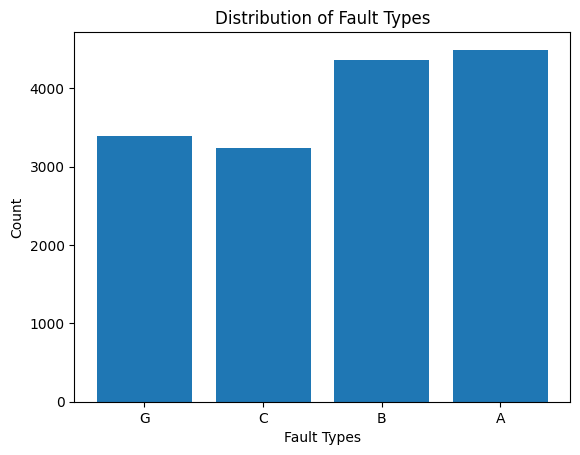

In [36]:
fault_type_list=[data['G'].sum(),data['C'].sum(),data['B'].sum(),data['A'].sum()]
fault_types=['G','C','B','A']
plt.bar(fault_types,fault_type_list)
plt.xlabel('Fault Types')
plt.ylabel('Count')
plt.title('Distribution of Fault Types')
plt.show()

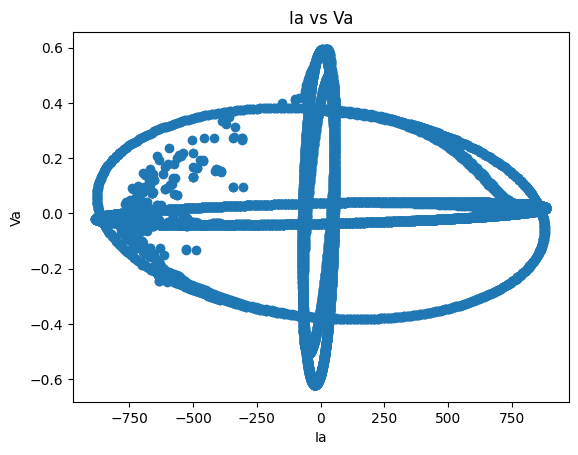

In [37]:
plt.scatter(data['Ia'],data['Va'])
plt.xlabel('Ia')
plt.ylabel('Va')
plt.title('Ia vs Va')
plt.show()

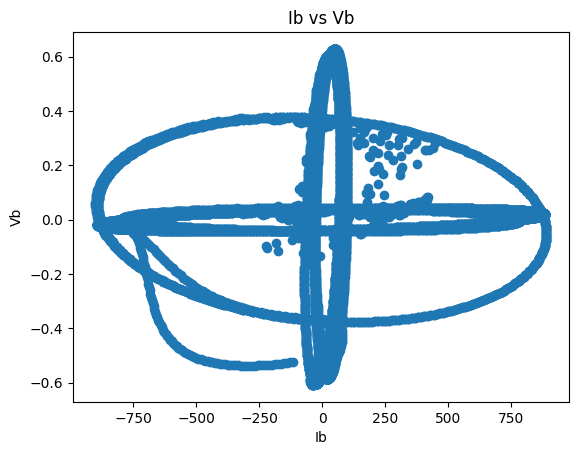

In [38]:
plt.scatter(data['Ib'],data['Vb'])
plt.xlabel('Ib')
plt.ylabel('Vb')
plt.title('Ib vs Vb')
plt.show()

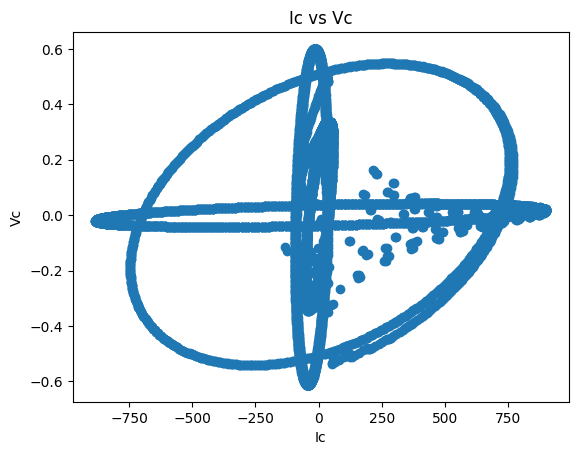

In [39]:
plt.scatter(data['Ic'],data['Vc'])
plt.xlabel('Ic')
plt.ylabel('Vc')
plt.title('Ic vs Vc')
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
scaler=StandardScaler()
x=scaler.fit_transform(data)
y=data[['G','C','B','A']].astype(str).agg(''.join,axis=1)
label_encoder=LabelEncoder()
y_encoded=label_encoder.fit_transform(y)

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y_encoded,test_size=0.2,random_state=42)

In [42]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [43]:
model=Sequential([
    Dense(64,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
    Dense(len(label_encoder.classes_),activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

c:\Users\darsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.2)

Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5723 - loss: 1.1922 - val_accuracy: 1.0000 - val_loss: 0.0508
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0262 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 7.2990e-04
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.4695e-04 - val_accuracy: 1.0000 - val_loss: 4.4096e-04
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.9803e-04 - val_accuracy: 1.0000 - val_loss: 2.9344e-04
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.7439e-04 - val_accuracy: 1.0000 - val_loss: 2.0813e-04
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - los

In [45]:
y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred,axis=1)
accuracy=accuracy_score(y_test,y_pred_classes)
precision=precision_score(y_test,y_pred_classes,average='weighted')
recall=recall_score(y_test,y_pred_classes,average='weighted')
f1=f1_score(y_test,y_pred_classes,average='weighted')
print(f'Accuracy : {accuracy}')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1 Score : {f1}')

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1 Score : 1.0


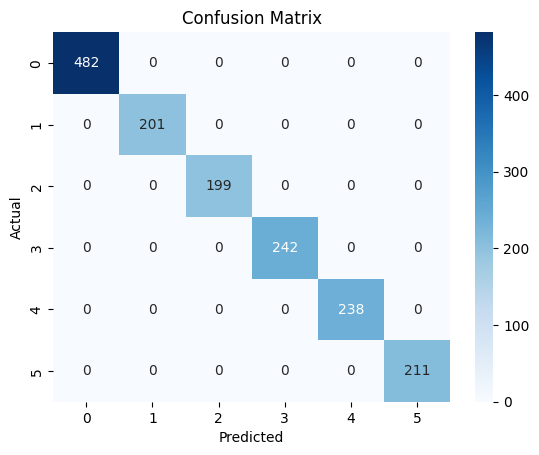

In [47]:
conf_matrix=confusion_matrix(y_test,y_pred_classes)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

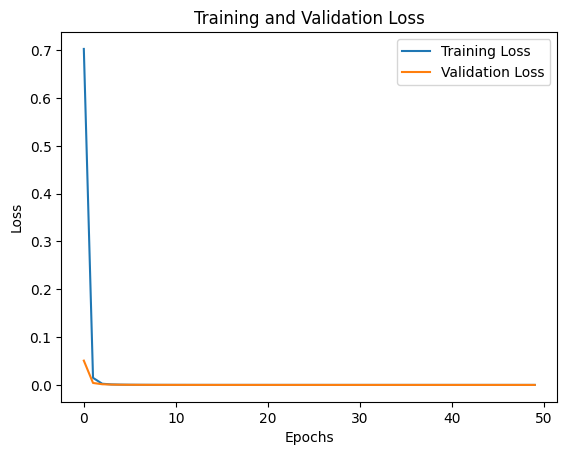

In [48]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

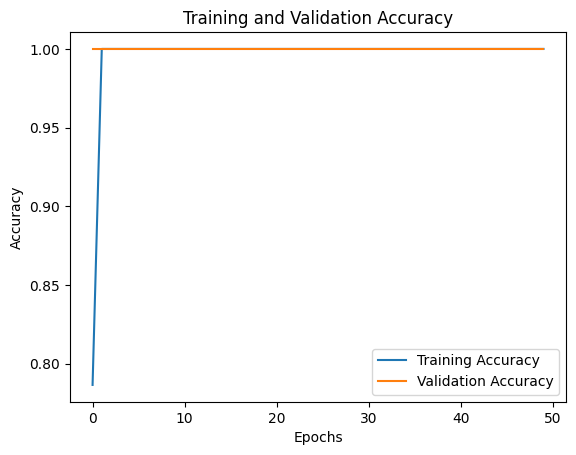

In [49]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier=DecisionTreeClassifier()
dt_classifier.fit(x_train,y_train)
y_pred_dt=dt_classifier.predict(x_test)

accuracy_dt=accuracy_score(y_test,y_pred_dt)
precision_dt=precision_score(y_test,y_pred_dt,average='weighted')
recall_dt=recall_score(y_test,y_pred_dt,average='weighted')
f1_dt=f1_score(y_test,y_pred_dt,average='weighted')

print(f'Accuracy : {accuracy_dt}')
print(f'Precision : {precision_dt}')
print(f'Recall : {recall_dt}')
print(f'F1 Score : {f1_dt}')

Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1 Score : 1.0


In [52]:
model.save('fault_classification_model.h5')
import joblib
joblib.dump(dt_classifier,'decision_tree_model.pkl')

['decision_tree_model.pkl']